# Your first deep neural network

# imports

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as keras

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
# from keras.utils import to_categorical

from keras.datasets import cifar10

# data

In [16]:
NUM_CLASSES = 10

In [17]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [18]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

In [19]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [20]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


# train

In [22]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [23]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 10s 3ms/step - loss: 1.9515 - accuracy: 0.2934
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6924 - accuracy: 0.3947
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6081 - accuracy: 0.4261
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5436 - accuracy: 0.4486
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4972 - accuracy: 0.4658
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4581 - accuracy: 0.4813
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4325 - accuracy: 0.4889
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4158 - accuracy: 0.4940
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3827 - accuracy: 0.5077
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.37

# analysis

In [24]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4483 - accuracy: 0.4852


[1.448330044746399, 0.4851999878883362]

In [25]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

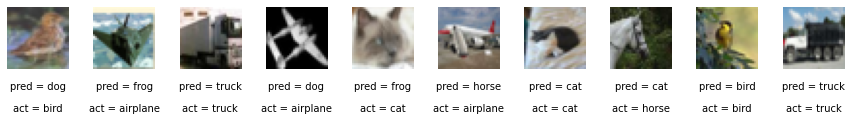

In [26]:

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
